In [56]:
## インポート
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import japanize_matplotlib
import jpy_datareader.data as web
from japanmap import picture

# e-StatのAPI_KEY
'''
「pythonで環境ファイルを読み込む」を参照
https://zenn.dev/nakashi94/articles/9c93b6a58acdb4
'''
api = os.environ.get("API_KEY")

In [3]:
'''
https://www.e-stat.go.jp/stat-search/database?page=1&layout=dataset&toukei=00450011&tstat=000001028897
https://www.e-stat.go.jp/stat-search/database?page=1&layout=dataset&toukei=00450011&tstat=000001028897&year=20220&hclass=10010&statdisp_id=0003411884&metadata=1&data=1
'''
df = web.DataReader("0003411884", "estat", api_key=api,retry_count=3)
df

,性別,都道府県（特別区－指定都市再掲）,時間軸(年次),人口
0,女,三重県,1935年,602239.0
1,女,三重県,1947年,740209.0
2,女,三重県,1950年,756392.0
3,女,三重県,1955年,767763.0
4,女,三重県,1960年,768339.0
...,...,...,...,...
3451,総数,鹿児島県,2018年,1604000.0
3452,総数,鹿児島県,2019年,1589000.0
3453,総数,鹿児島県,2020年,1577022.0
3454,総数,鹿児島県,2021年,1565000.0


In [15]:
## データな中身を確認
colum_list = ['性別', '都道府県（特別区－指定都市再掲）','時間軸(年次)']

print(f'データ数：{df.shape[0]}')
print(f'カラム数：{df.shape[1]}')

for colum in colum_list:
    print(f'▼▼▼▼▼▼ {colum} ▼▼▼▼▼▼')
    print(df[colum].value_counts())
    print('')

データ数：3456
カラム数：4
▼▼▼▼▼▼ 性別 ▼▼▼▼▼▼
性別
女     1152
男     1152
総数    1152
Name: count, dtype: int64

▼▼▼▼▼▼ 都道府県（特別区－指定都市再掲） ▼▼▼▼▼▼
都道府県（特別区－指定都市再掲）
三重県     72
京都府     72
新潟県     72
東京都     72
栃木県     72
沖縄県     72
滋賀県     72
熊本県     72
石川県     72
神奈川県    72
福井県     72
福岡県     72
福島県     72
秋田県     72
群馬県     72
茨城県     72
長崎県     72
長野県     72
青森県     72
静岡県     72
香川県     72
高知県     72
鳥取県     72
愛知県     72
愛媛県     72
徳島県     72
奈良県     72
佐賀県     72
全国      72
兵庫県     72
北海道     72
千葉県     72
和歌山県    72
埼玉県     72
大分県     72
大阪府     72
宮城県     72
広島県     72
宮崎県     72
富山県     72
山口県     72
山形県     72
山梨県     72
岐阜県     72
岡山県     72
岩手県     72
島根県     72
鹿児島県    72
Name: count, dtype: int64

▼▼▼▼▼▼ 時間軸(年次) ▼▼▼▼▼▼
時間軸(年次)
1935年    144
1947年    144
2021年    144
2020年    144
2019年    144
2018年    144
2017年    144
2016年    144
2015年    144
2014年    144
2010年    144
2005年    144
2000年    144
1995年    144
1990年    144
1985年    144
1980年    144
1975年    144
1970年    144
1965年    144
1960年    1

In [4]:
df[(df['時間軸(年次)']=='2022年')]

,性別,都道府県（特別区－指定都市再掲）,時間軸(年次),人口
23,女,三重県,2022年,865000.0
47,女,京都府,2022年,1300000.0
71,女,佐賀県,2022年,417000.0
95,女,全国,2022年,62716845.0
119,女,兵庫県,2022年,2777000.0
...,...,...,...,...
3359,総数,静岡県,2022年,3484000.0
3383,総数,香川県,2022年,920000.0
3407,総数,高知県,2022年,671000.0
3431,総数,鳥取県,2022年,539000.0


In [49]:
df2 = df[(df['時間軸(年次)']=='2022年') & (df['性別']=='総数') & (df['都道府県（特別区－指定都市再掲）'] !='全国')]
# indexの振り直し
df2 = df2.reset_index()
df2 = df2.drop(['index','時間軸(年次)','性別'],axis=1)
# カラム名変更
df2.rename(columns={'都道府県（特別区－指定都市再掲）':'name', '人口': 'population_jp'},inplace=True)
# indexmを変更
df2 = df2.set_index('name')
df2

,population_jp
name,
三重県,1689000.0
京都府,2485000.0
佐賀県,793000.0
兵庫県,5287000.0
北海道,5098000.0
千葉県,6100000.0
和歌山県,896000.0
埼玉県,7136000.0
大分県,1092000.0


In [57]:
df2.to_csv('../data/population_jp.csv',index=True)

In [55]:
# 都道府県を色データに変換
min_val = df2['population_jp'].min()
max_val = df2['population_jp'].max()
print(f'最小値：{min_val},最大値:{max_val}')

最小値：539000.0,最大値:13443000.0


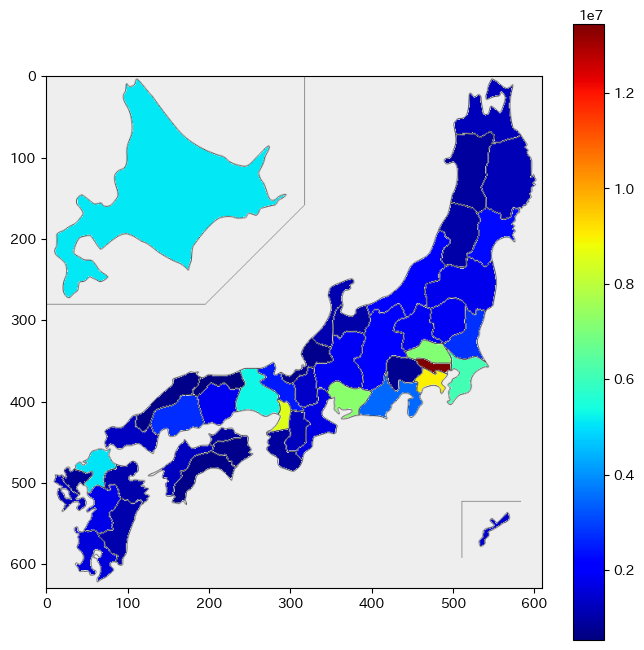

In [54]:
# カラーマップでmatplotlibのcmapのjetを設定
cmap = plt.get_cmap('jet')

# 都道府県を色データに変換
min_val = df2['population_jp'].min()
max_val = df2['population_jp'].max()

# カラーマップの最小値と最大値を設定
norm = plt.Normalize(vmin=min_val,vmax=max_val)

# データをSeries化する際に可視化対象のデータをカラーマップに従ってカラーコードに変換する関数を作成
fcol = lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex()

# グラフのサイズ調整
plt.rcParams['figure.figsize'] = (8,8)

# グラフを描く際の基本パーツを生成
'''
Figure：描画領域全体
Axes：一つ一つのプロットを描く領域
'''
fig, ax = plt.subplots()

# カラーマップの凡例を表示
plt.colorbar(plt.cm.ScalarMappable(norm, cmap), ax=ax)

# japanmapライブラリとmatplotlibを使って可視化
plt.imshow(picture(df2['population_jp'].apply(fcol)))